In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
from datetime import datetime



### READ CSV

In [2]:
path = "Resources/MSP_Weather.csv"
data = pd.read_csv(path)
data = pd.DataFrame(data)
data.head()

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description
0,1514764800,-8.57,-21.80,-11.20,-5.80,67,11.41,Clear,sky is clear
1,1514768400,-9.85,-22.49,-11.20,-9.04,70,10.36,Clear,sky is clear
2,1514772000,-9.85,-23.17,-11.29,-9.04,63,11.50,Clear,sky is clear
3,1514775600,-10.41,-22.43,-12.04,-9.04,69,9.22,Clear,sky is clear
4,1514779200,-10.44,-22.43,-12.40,-9.04,76,9.22,Clear,sky is clear


In [3]:
data.dtypes

dt                       int64
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
humidity                 int64
wind_speed             float64
weather_main            object
weather_description     object
dtype: object

In [4]:
data['dt'] = pd.to_datetime(data['dt'], unit='s')

In [5]:
data['ReportedYearMonth'] = pd.DatetimeIndex(data['dt']).to_period('M')
data.head()

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,ReportedYearMonth
0,2018-01-01 00:00:00,-8.57,-21.80,-11.20,-5.80,67,11.41,Clear,sky is clear,2018-01
1,2018-01-01 01:00:00,-9.85,-22.49,-11.20,-9.04,70,10.36,Clear,sky is clear,2018-01
2,2018-01-01 02:00:00,-9.85,-23.17,-11.29,-9.04,63,11.50,Clear,sky is clear,2018-01
3,2018-01-01 03:00:00,-10.41,-22.43,-12.04,-9.04,69,9.22,Clear,sky is clear,2018-01
4,2018-01-01 04:00:00,-10.44,-22.43,-12.40,-9.04,76,9.22,Clear,sky is clear,2018-01


In [6]:
data['ReportedYearDay'] = pd.DatetimeIndex(data['dt']).to_period('D')
data.head()

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,ReportedYearMonth,ReportedYearDay
0,2018-01-01 00:00:00,-8.57,-21.80,-11.20,-5.80,67,11.41,Clear,sky is clear,2018-01,2018-01-01
1,2018-01-01 01:00:00,-9.85,-22.49,-11.20,-9.04,70,10.36,Clear,sky is clear,2018-01,2018-01-01
2,2018-01-01 02:00:00,-9.85,-23.17,-11.29,-9.04,63,11.50,Clear,sky is clear,2018-01,2018-01-01
3,2018-01-01 03:00:00,-10.41,-22.43,-12.04,-9.04,69,9.22,Clear,sky is clear,2018-01,2018-01-01
4,2018-01-01 04:00:00,-10.44,-22.43,-12.40,-9.04,76,9.22,Clear,sky is clear,2018-01,2018-01-01


In [7]:
data['ReportedYear'] = pd.DatetimeIndex(data['dt']).to_period('Y')
data.head()

,dt,temp,feels_like,temp_min,temp_max,humidity,wind_speed,weather_main,weather_description,ReportedYearMonth,ReportedYearDay,ReportedYear
0,2018-01-01 00:00:00,-8.57,-21.80,-11.20,-5.80,67,11.41,Clear,sky is clear,2018-01,2018-01-01,2018
1,2018-01-01 01:00:00,-9.85,-22.49,-11.20,-9.04,70,10.36,Clear,sky is clear,2018-01,2018-01-01,2018
2,2018-01-01 02:00:00,-9.85,-23.17,-11.29,-9.04,63,11.50,Clear,sky is clear,2018-01,2018-01-01,2018
3,2018-01-01 03:00:00,-10.41,-22.43,-12.04,-9.04,69,9.22,Clear,sky is clear,2018-01,2018-01-01,2018
4,2018-01-01 04:00:00,-10.44,-22.43,-12.40,-9.04,76,9.22,Clear,sky is clear,2018-01,2018-01-01,2018


### Create Monthly DataFrame


In [8]:
tempmonthly = data.groupby(['ReportedYearMonth'])
tempmonthly = data["ReportedYearMonth"].value_counts().reset_index()
tempmonthly = tempmonthly.rename(columns = {"index":"ReportedYearMonth","ReportedYearMonth":"Count"})
#tempmonthly

In [9]:
tempmonthly_2 = data.groupby(['ReportedYearMonth'])
tempmonthly_2 = tempmonthly_2["temp_max"].sum()
tempmonthly_2 = pd.DataFrame([tempmonthly_2]).transpose()
#tempmonthly_2

In [10]:
temp_final_df = pd.merge(tempmonthly, tempmonthly_2, on="ReportedYearMonth" )

In [11]:
temp_final_df['Avg_temp'] = round(temp_final_df['temp_max']/temp_final_df['Count'],0)
#temp

In [12]:
temp = temp_final_df.sort_values("ReportedYearMonth", ascending = True)
#temp

In [13]:
temp = temp.reset_index()
#temp

In [14]:
final = temp.drop(columns=['Count','temp_max','index'])
final


,ReportedYearMonth,Avg_temp
0,2018-01,18.0
1,2018-02,18.0
2,2018-03,34.0
3,2018-04,38.0
4,2018-05,69.0
5,2018-06,74.0
6,2018-07,76.0
7,2018-08,74.0
8,2018-09,66.0
9,2018-10,47.0


In [15]:
final.to_csv("Output/Weather_AvgTemp_Monthly", index=False, header = True)

In [16]:
#final.index=final.index.to_series().astype(str)
#final

In [17]:
final_plot = final.set_index("ReportedYearMonth")
final_plot


,Avg_temp
ReportedYearMonth,
2018-01,18.0
2018-02,18.0
2018-03,34.0
2018-04,38.0
2018-05,69.0
2018-06,74.0
2018-07,76.0
2018-08,74.0
2018-09,66.0


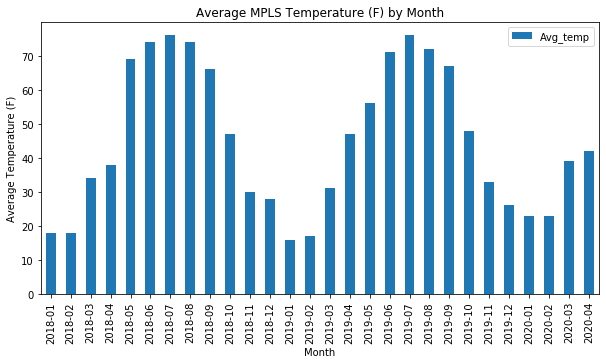

In [18]:
final_plot.plot(kind="bar",figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Average Temperature (F)")
#plt.xticks(tick_locations, Date, rotation=90);
plt.title("Average MPLS Temperature (F) by Month")

plt.savefig('Output/Weather_Avg_Month.png',bbox_inches='tight')
plt.show()

### CREATE DAILY DATAFRAME


In [19]:
tempdaily = data.groupby(['ReportedYearDay'])
tempdaily = data["ReportedYearDay"].value_counts().reset_index()
tempdaily = tempdaily.rename(columns = {"index":"ReportedYearDay","ReportedYearDay":"Count"})
#tempdaily

In [20]:
tempdaily_2 = data.groupby(['ReportedYearDay'])
tempdaily_2 = tempdaily_2["temp_max"].sum()
tempdaily_2 = pd.DataFrame([tempdaily_2]).transpose()
tempdaily_2.reset_index()

,ReportedYearDay,temp_max
0,2018-01-01,-163.32
1,2018-01-02,2.24
2,2018-01-03,193.62
3,2018-01-04,28.38
4,2018-01-05,-54.65
...,...,...
835,2020-04-15,678.76
836,2020-04-16,856.26
837,2020-04-17,994.95
838,2020-04-18,1183.00


In [21]:
temp_daily_merge_df = pd.merge(tempdaily, tempdaily_2, on="ReportedYearDay")
#temp_daily_merge_df

In [22]:
temp_daily_merge_df['Avg_temp'] = round(temp_daily_merge_df['temp_max']/temp_daily_merge_df['Count'],0)
#temp_daily_merge_df

In [23]:
temp_daily_merge_sort = temp_daily_merge_df.sort_values("ReportedYearDay", ascending = True)
#temp_daily_merge_sort

In [24]:
temp_daily_merge_sort = temp_daily_merge_sort.reset_index()
#temp_daily_merge_sort

In [25]:
temp_daily_final = temp_daily_merge_sort.drop(columns=['Count','temp_max','index'])
temp_daily_final


,ReportedYearDay,Avg_temp
0,2018-01-01,-7.0
1,2018-01-02,0.0
2,2018-01-03,8.0
3,2018-01-04,1.0
4,2018-01-05,-2.0
...,...,...
835,2020-04-15,28.0
836,2020-04-16,36.0
837,2020-04-17,41.0
838,2020-04-18,49.0


In [26]:
temp_daily_final.to_csv("Output/Weather_AvgTemp_Daily", index=False, header = True)



### CREATE DATAFRAMES FOR EACH YEAR

In [27]:
data_2018 = data.loc[data["ReportedYear"] == "2018"]
data_2019 = data.loc[data["ReportedYear"] == "2019"]
data_2020 = data.loc[data["ReportedYear"] == "2020"]

### CREATE WEATHER DESCRIPTION DATAFRAMES

In [28]:
data_2018_group= data_2018.groupby(['ReportedYearDay'])
data_2019_group= data_2019.groupby(['ReportedYearDay'])
data_2020_group= data_2020.groupby(['ReportedYearDay'])


In [29]:
DW18_df = data_2018_group.agg(lambda x:x.value_counts().index[0])
DW18_df = DW18_df[['weather_main']]
#DW18_df.head()

In [30]:
DW19_df = data_2019_group.agg(lambda x:x.value_counts().index[0])
DW19_df = DW19_df[['weather_main']]
#DW19_df.head(20)

In [31]:
DW20_df = data_2020_group.agg(lambda x:x.value_counts().index[0])
DW20_df = DW20_df[['weather_main']]
#DW20_df.head(20)

In [32]:
#data_18_line = data_18_group_df.unstack(1)
#data_18_line

In [33]:
DW19_chart = DW19_df['weather_main'].value_counts()
DW19_chart = pd.DataFrame(DW19_chart)
DW19_chart['Days of the Year'] = DW19_chart['weather_main']/365
DW19_chart_percent = DW19_chart.drop(columns=['weather_main'])
DW19 = DW19_chart_percent.reset_index()
DW19

,index,Days of the Year
0,Clouds,0.775342
1,Clear,0.079452
2,Rain,0.071233
3,Snow,0.046575
4,Mist,0.027397


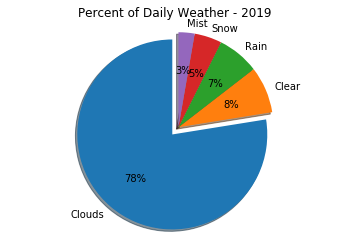

In [34]:
labels = DW19['index']
sizes = DW19['Days of the Year']
explode = (.1, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent of Daily Weather - 2019')
plt.savefig('Output/percent_weath_2019',dpi=150,bbox_inches='tight')
plt.show()


In [35]:
DW18_chart = DW18_df['weather_main'].value_counts()
DW18_chart = pd.DataFrame(DW18_chart)
DW18_chart['Days of the Year'] = DW18_chart['weather_main']/365
DW18_chart_percent = DW18_chart.drop(columns=['weather_main'])
DW18 = DW18_chart_percent.reset_index()
DW18


,index,Days of the Year
0,Clouds,0.775342
1,Clear,0.136986
2,Rain,0.043836
3,Snow,0.021918
4,Mist,0.021918


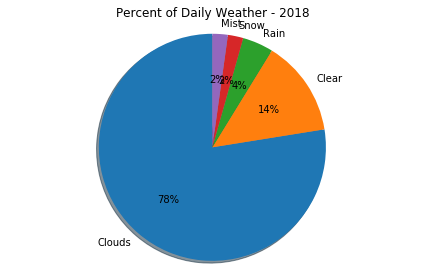

In [36]:
labels = DW18['index']
sizes = DW18['Days of the Year']
explode = (0, 0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percent of Daily Weather - 2018')
plt.savefig('Output/percent_weath_2018',dpi=150,bbox_inches='tight')
plt.tight_layout()
plt.show()



### CREATE HIGH TEMPERATURE AND LOW TEMPERATURE DATAFRAMES

In [37]:
final.describe()

,Avg_temp
count,28.000000
mean,44.964286
std,21.194832
min,16.000000
25%,27.500000
50%,40.500000
75%,67.500000
max,76.000000


In [38]:
#Create DataFrame for below average temperature
monthly_belowAvg = final.loc[final["Avg_temp"] <= 45]
monthly_belowAvg= monthly_belowAvg.sort_values("ReportedYearMonth", ascending = True)
monthly_belowAvg = monthly_belowAvg.rename(columns={"ReportedYearMonth":"Month"})
monthly_belowAvg = monthly_belowAvg.reset_index()
monthly_belowAvg = monthly_belowAvg.drop(columns=['index'])
monthly_belowAvg

,Month,Avg_temp
0,2018-01,18.0
1,2018-02,18.0
2,2018-03,34.0
3,2018-04,38.0
4,2018-11,30.0
5,2018-12,28.0
6,2019-01,16.0
7,2019-02,17.0
8,2019-03,31.0
9,2019-11,33.0


In [39]:
#Create DataFrame for above average temperature
monthly_aboveAvg = final.loc[final["Avg_temp"] > 45]
monthly_aboveAvg= monthly_aboveAvg.sort_values("ReportedYearMonth", ascending = True)
monthly_aboveAvg = monthly_aboveAvg.rename(columns={"ReportedYearMonth":"Month"})
monthly_aboveAvg = monthly_aboveAvg.reset_index()
monthly_aboveAvg = monthly_aboveAvg.drop(columns=['index'])
monthly_aboveAvg

,Month,Avg_temp
0,2018-05,69.0
1,2018-06,74.0
2,2018-07,76.0
3,2018-08,74.0
4,2018-09,66.0
5,2018-10,47.0
6,2019-04,47.0
7,2019-05,56.0
8,2019-06,71.0
9,2019-07,76.0


In [40]:
monthly_aboveAvg.to_csv("Output/Weather_Monthly_Above", index=False, header = True)
monthly_belowAvg.to_csv("Output/Weather_Monthly_Below", index=False, header = True)
